In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# i/p for i/p neurons
x = np.array([[0,0,1,1],[0,1,0,1]])
# o/p for o/p neurons
y = np.array([[0,1,1,0]])


In [53]:
# no. of i/p
n_x = 2
# no. of hidden layers
n_h = 2
# no. of o/p layer
n_y = 1

In [54]:
# number of training examples
m = x.shape[1] # number of columns in i/p matrix x
# print(m)

# learning rate
lr = 0.1 # determines step size duign optimization process

# random seeds - for consistent/reproducible results
np.random.seed(2)

In [55]:
# weight matrix for neural network
# generates matrix with dimension n_h * n_x  i.e, 2*2 with random values between 0 and 1
w1 = np.random.rand(n_h, n_x) # weight matrix for hidden layer

# generates n_y * n_h i.e 1*2 matrix
w2 = np.random.rand(n_y, n_h) # weight matrix for output layer

In [56]:
# list to accumulate losses during traning
losses = []

In [57]:
# Sigmoid actiavation function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [58]:
# Forward Propagation
# a_1 = x_1 * w_13 + x_2 * w_24
# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x) # computes weighted sum for hidden layer
    a1 = sigmoid(z1) # applies sigmoid function to hidden layer's weighted sum
    z2 = np.dot(w2,a1) # computes weighted sum for o/p layer
    a2 = sigmoid(z2) # applies sigmoid function to o/p layers' weighted sum
    return z1,a1,z2,a2

In [59]:
# Backward Propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):
    
    dz2 = a2-y # error at o/p layer
    dw2 = np.dot(dz2,a1.T)/m # gradient of loss w.r.t w2
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1) # error a5 hidden layer
    dw1 = np.dot(dz1,x.T)/m # gradient of loss w.r.t w1

    # reshaping dw1 & dw2 to match the dimension of w1 & w2
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return dz2,dw2,dz1,dw1

In [60]:
iterations = 250000 # no. of training iterations
for i in range(iterations):
    z1,a1,z2,a2 = forward_prop(w1,w2,x) # forward propagation to get o/p
    loss = -(1/m)*np.sum(y*np.log(a2)+(1-y)*np.log(1-a2)) # binary cross-entropy loss
    losses.append(loss) # append loss to losses list
    da2,dw2,dz1,dw1 = back_prop(m,w1,w2,z1,a1,z2,a2,y) # back propagation to get gradients
    w2 = w2-lr*dw2 # updated weights for o/p lyaer
    w1 = w1-lr*dw1 # updated weights for hidden layer


Text(0, 0.5, 'Loss')

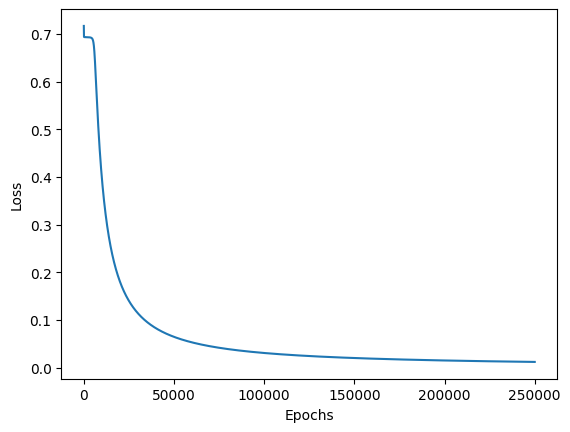

In [61]:
# plotting
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [64]:
def predict(w1,w2,input):
    """
    makes predictions with trained neural network
    
    args:
    w1(matrix): for hidden layer
    w2(matrix): for o/p layer 
    """
    z1,a1,z2,a2 = forward_prop(w1,w2,input) # forward propagation - computes o/p 'a2' of neural n/w for given i/p
    a2 = np.squeeze(a2) # squeezes o/p to remove single dimensional entries from the shape
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [63]:
test = np.array([[1],[1]])
predict(w1,w2,test)

For input [1, 1] output is 0
